# Social Progress Index vs. Style of Government


## Data Loading/Preprocessing

In [76]:
# imports
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns

In [77]:
spiData = pd.read_csv('SPIData.csv')
spiData.head(5)

,SPI Rank,Country,SPI country code,SPI year,Status,Social Progress Index,Basic Human Needs,Foundations of Wellbeing,Opportunity,Nutrition and Basic Medical Care,...,Satisfied demand for contraception (% of women),Equality of political power by socioeconomic position (0=unequal power; 4=equal power),Equality of political power by social group (0=unequal power; 4=equal power),Equality of political power by gender (0=unequal power; 4=equal power),Discrimination and violence against minorities (0=low; 10=high),Acceptance of gays and lesbians (0=low; 100=high),Quality weighted universities (points),Citable documents,Women with advanced education (%),Years of tertiary schooling
0,NaN,World,WWW,2020,NaN,64.24,74.65,60.82,57.25,84.63,...,73.8590,1.6918,1.6908,1.7663,7.3247,0.3343,223.0656,0.5025,0.5444,2.0406
1,NaN,World,WWW,2019,NaN,64.32,74.31,60.75,57.90,84.36,...,73.6103,1.8016,1.8458,1.9055,7.2709,0.3149,214.7963,0.4749,0.5308,2.0206
2,NaN,World,WWW,2018,NaN,64.05,74.06,60.54,57.54,84.04,...,73.3432,1.8182,1.8529,1.8884,7.4107,0.2772,195.1538,0.4527,0.5159,1.9994
3,NaN,World,WWW,2017,NaN,63.78,73.62,60.17,57.56,83.66,...,73.1914,1.8684,1.8280,1.9282,7.5079,0.2634,173.0154,0.4425,0.4995,1.9618
4,NaN,World,WWW,2016,NaN,63.23,73.24,59.07,57.39,83.24,...,73.0024,1.8897,1.8477,1.9353,7.5401,0.2556,158.3055,0.4252,0.4824,1.8963


In [78]:
spiData = pd.DataFrame(pd.concat([spiData['Country'],spiData['SPI year'],spiData['Social Progress Index']],axis=1))

In [79]:
# Making sure row is for 2020
for index, row in spiData.iterrows():
    if row['SPI year']!=2020:
        spiData.drop(index, inplace=True)

In [80]:
spiData = pd.DataFrame(pd.concat([spiData['Country'],spiData['Social Progress Index']],axis=1))
spiData

,Country,Social Progress Index
0,World,64.24
10,Afghanistan,42.29
20,Albania,75.41
30,Algeria,69.92
40,Angola,48.16
...,...,...
1590,Uruguay,82.99
1600,Uzbekistan,64.98
1610,Vietnam,68.85
1620,Zambia,55.34


In [81]:
democracyData = pd.read_csv('DemocracyData.csv')
democracyData.head(5)

,geo,name,time,Democracy index (EIU),Electoral pluralism index (EIU),Government index (EIU),Political participation index(EIU),Political culture index (EIU),Civil liberties index (EIU),Change in democracy index (EIU)
0,afg,Afghanistan,2006,30.6,61.70,0.00,22.2,25.0,44.10,NaN
1,afg,Afghanistan,2007,30.4,56.70,3.95,22.2,25.0,44.10,-0.2
2,afg,Afghanistan,2008,30.2,51.70,7.90,22.2,25.0,44.10,-0.2
3,afg,Afghanistan,2009,27.5,38.35,7.90,25.0,25.0,41.15,-2.7
4,afg,Afghanistan,2010,24.8,25.00,7.90,27.8,25.0,38.20,-2.7


In [82]:
democracyData = pd.DataFrame(pd.concat([democracyData['name'],democracyData['time'],democracyData['Democracy index (EIU)']],axis=1))
democracyData

,name,time,Democracy index (EIU)
0,Afghanistan,2006,30.6
1,Afghanistan,2007,30.4
2,Afghanistan,2008,30.2
3,Afghanistan,2009,27.5
4,Afghanistan,2010,24.8
...,...,...,...
2333,Zimbabwe,2015,30.5
2334,Zimbabwe,2016,30.5
2335,Zimbabwe,2017,31.6
2336,Zimbabwe,2018,31.6


In [83]:
# Making sure row is for 2020
for index, row in democracyData.iterrows():
    if row['time']!=2019:
        democracyData.drop(index, inplace=True)

In [84]:
democracyData = democracyData.drop(columns=['time'])

In [85]:
data = []
countries = []

In [86]:
for index, row in spiData.iterrows():
    country = row['Country']
    socialProgressIndex = row['Social Progress Index']

    for i, r in democracyData.iterrows():
        newCountry = r['name']
        democracyIndex = r['Democracy index (EIU)']

        if country==newCountry:
            countries.append([country])
            data.append([socialProgressIndex,democracyIndex])

In [87]:
X = pd.DataFrame(data)[0]
y = pd.DataFrame(data)[1]

## Data Visualization

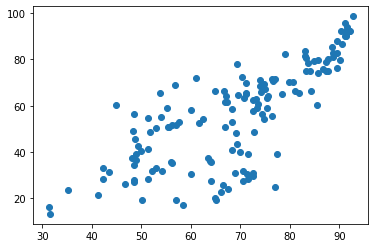

In [88]:
plt.scatter(X,y)

In [89]:
x = pd.DataFrame(data)

## KMeans Clustering

In [90]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [91]:
x = preprocessing.scale(x)

In [92]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss

[292.0,
 105.55591501586689,
 69.50608389834288,
 44.60726695642952,
 30.896534665205603,
 26.13201021758463,
 23.028411675618205,
 18.703948763935337,
 16.33378214129425]

Text(0.5, 0, '# of cluster')

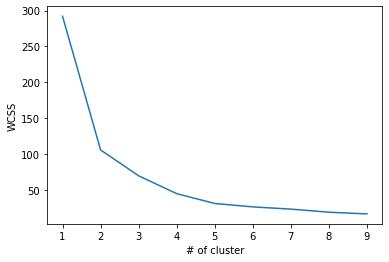

In [93]:
plt.plot(range(1,10),wcss)
plt.ylabel('WCSS')
plt.xlabel('# of cluster')

In [94]:
kmeans = KMeans(5)

identified_clusters = kmeans.fit_predict(x)
identified_clusters

data_w_cluster = pd.DataFrame(x.copy())
data_w_cluster['Cluster'] = identified_clusters
data_w_cluster = data_w_cluster.rename(columns={0: "SPI", 1: "Democracy Index"})

#data_w_cluster = 
data_w_cluster = pd.concat([data_w_cluster,pd.DataFrame(countries)],axis=1)

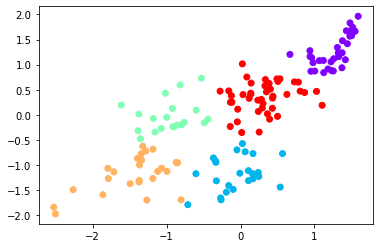

In [95]:
plt.scatter(data_w_cluster['SPI'],data_w_cluster['Democracy Index'],c=data_w_cluster['Cluster'],cmap='rainbow')

In [103]:
group1 = []
group2 = []
group3 = []
group4 = []
group5 = []

In [110]:
for i,r in data_w_cluster.iterrows():
    if r['Cluster']==0:
        group1.append(r[0])
    elif r['Cluster']==1:
        group2.append(r[0])
    elif r['Cluster']==2:
        group3.append(r[0])
    elif r['Cluster']==3:
        group4.append(r[0])
    elif r['Cluster']==4:
        group5.append(r[0])

In [118]:
data_w_cluster.head(20)

,SPI,Democracy Index,Cluster,0
0,-1.789767,-1.271301,3,Afghanistan
1,0.430850,0.129633,4,Albania
2,0.062758,-0.736734,1,Algeria
3,-1.396198,-0.870376,3,Angola
4,0.782850,0.650375,4,Argentina
5,0.501250,-0.031659,4,Armenia
6,1.495566,1.604301,0,Australia
7,1.375551,1.235634,0,Austria
8,-0.326788,-1.317385,1,Azerbaijan
9,-0.159840,-1.409551,1,Bahrain


In [119]:
# Blue list
group1

['Australia',
 'Austria',
 'Belgium',
 'Canada',
 'Costa Rica',
 'Cyprus',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Chile',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Mauritius',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Portugal',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Kingdom',
 'United States',
 'Uruguay']

In [112]:
# green
group2

['Algeria',
 'Azerbaijan',
 'Bahrain',
 'Belarus',
 'Cuba',
 'Egypt',
 'Gabon',
 'China',
 'Iran',
 'Iraq',
 'Jordan',
 'Kazakhstan',
 'Kuwait',
 'Lebanon',
 'Nicaragua',
 'Oman',
 'Qatar',
 'Russia',
 'Saudi Arabia',
 'Turkey',
 'Turkmenistan',
 'United Arab Emirates',
 'Uzbekistan',
 'Vietnam']

In [113]:
# turquoise
group3

['Bangladesh',
 'Benin',
 'Guatemala',
 'Haiti',
 'Honduras',
 'India',
 'Kenya',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Nepal',
 'Papua New Guinea',
 'Senegal',
 'Sierra Leone',
 'Tanzania',
 'Timor-Leste',
 'Uganda',
 'Zambia']

In [114]:
# Orange
group4

['Afghanistan',
 'Angola',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Djibouti',
 'Equatorial Guinea',
 'Eritrea',
 'Ethiopia',
 'Guinea',
 'Guinea-Bissau',
 'Chad',
 'Mauritania',
 'Mozambique',
 'Myanmar',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Sudan',
 'Tajikistan',
 'Togo',
 'Zimbabwe']

In [115]:
# Red
group5

['Albania',
 'Argentina',
 'Armenia',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Colombia',
 'Croatia',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Fiji',
 'Georgia',
 'Ghana',
 'Guyana',
 'Hungary',
 'Indonesia',
 'Jamaica',
 'Malaysia',
 'Mexico',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Namibia',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Romania',
 'Serbia',
 'Singapore',
 'South Africa',
 'Sri Lanka',
 'Suriname',
 'Thailand',
 'Trinidad and Tobago',
 'Tunisia',
 'Ukraine']